In [1]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
%matplotlib inline

In [47]:
# 1. What does the data describe?

print 'This data, taken from the College Board, gives the mean SAT math and verbal scores' 
print 'and the participation rate for each state and the District of Columbia for the year 2001'

This data, taken from the College Board, gives the mean SAT math and verbal scores
and the participation rate for each state and the District of Columbia for the year 2001


In [50]:
#2. Does the data look complete? Are there any obvious issues with the observations?
print 'From an overview of the data, there seems to be no abnormalities or obvious issues, and the data seems complete'
print 'with each state and their test results.'

From an overview of the data, there seems to be no abnormalities or obvious issues, and the data seems complete
with each state and their test results.


In [4]:
#3. Create a data dictionary for the dataset
data = []
with open('sat_scores.csv', 'rU') as f:
    reader = csv.reader(f)
    for row in reader:
        data.append(row)
        
f.close()

data

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500'],
 ['VA', '68', '510', '501'],
 ['DE', '67', '501', '499'],
 ['MD', '65', '508', '510'],
 ['NC', '65', '493', '499'],
 ['GA', '63', '491', '489'],
 ['IN', '60', '499', '501'],
 ['SC', '57', '486', '488'],
 ['DC', '56', '482', '474'],
 ['OR', '55', '526', '526'],
 ['FL', '54', '498', '499'],
 ['WA', '53', '527', '527'],
 ['TX', '53', '493', '499'],
 ['HI', '52', '485', '515'],
 ['AK', '51', '514', '510'],
 ['CA', '51', '498', '517'],
 ['AZ', '34', '523', '525'],
 ['NV', '33', '509', '515'],
 ['CO', '31', '539', '542'],
 ['OH', '26', '534', '439'],
 ['MT', '23', '539', '539'],
 ['WV', '18', '527', '512'],
 ['ID', '17', '543', '542'],
 ['TN', '13', '562', '553'],
 ['NM', '13', '551', '542'],
 ['IL

In [5]:
#4. Load the data into a list of lists
#5. Print the data
headers = data[0]
data = data[1:]

#6. Extract a list of the labels from the data, and remove them from the data.
data = data[:-1]

data

[['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500'],
 ['VA', '68', '510', '501'],
 ['DE', '67', '501', '499'],
 ['MD', '65', '508', '510'],
 ['NC', '65', '493', '499'],
 ['GA', '63', '491', '489'],
 ['IN', '60', '499', '501'],
 ['SC', '57', '486', '488'],
 ['DC', '56', '482', '474'],
 ['OR', '55', '526', '526'],
 ['FL', '54', '498', '499'],
 ['WA', '53', '527', '527'],
 ['TX', '53', '493', '499'],
 ['HI', '52', '485', '515'],
 ['AK', '51', '514', '510'],
 ['CA', '51', '498', '517'],
 ['AZ', '34', '523', '525'],
 ['NV', '33', '509', '515'],
 ['CO', '31', '539', '542'],
 ['OH', '26', '534', '439'],
 ['MT', '23', '539', '539'],
 ['WV', '18', '527', '512'],
 ['ID', '17', '543', '542'],
 ['TN', '13', '562', '553'],
 ['NM', '13', '551', '542'],
 ['IL', '12', '576', '589'],
 ['KY', '12', 

In [6]:
#7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)
state_names = [rows[headers.index('State')] for rows in data]
state_names

['CT',
 'NJ',
 'MA',
 'NY',
 'NH',
 'RI',
 'PA',
 'VT',
 'ME',
 'VA',
 'DE',
 'MD',
 'NC',
 'GA',
 'IN',
 'SC',
 'DC',
 'OR',
 'FL',
 'WA',
 'TX',
 'HI',
 'AK',
 'CA',
 'AZ',
 'NV',
 'CO',
 'OH',
 'MT',
 'WV',
 'ID',
 'TN',
 'NM',
 'IL',
 'KY',
 'WY',
 'MI',
 'MN',
 'KS',
 'AL',
 'NE',
 'OK',
 'MO',
 'LA',
 'WI',
 'AR',
 'UT',
 'IA',
 'SD',
 'ND',
 'MS']

In [7]:
#8. Print the types of each column
[type(i) for i in data[0]]

[str, str, str, str]

In [8]:
#9. Do any types need to be reassigned? If so, go ahead and do it

rate = headers.index('Rate')
math = headers.index('Math')
verbal = headers.index('Verbal')

for row in data:
    row[rate] = int(row[rate])
    row[math] = int(row[math])
    row[verbal] = int(row[verbal])
[type(i) for i in data[0]]

[str, int, int, int]

In [9]:
#10. Create a dictionary for each column mapping the State to its respective value for that column.
state_rating = {}
state_math_score = {}
state_verbal_score = {}

for row in data:
    state_rating[row[0]] = row[rate]
    state_math_score[row[0]] = row[math]
    state_verbal_score[row[0]] = row[verbal]


In [15]:
#11. Create a dictionary with the values for each of the numeric columns
sat_dic = {'rate': [row[headers.index('Rate')] for row in data],
            'math': [row[headers.index('Math')] for row in data],
            'verbal': [row[headers.index('Verbal')] for row in data]}
sat_dic

{'math': [510,
  513,
  515,
  505,
  516,
  499,
  499,
  506,
  500,
  501,
  499,
  510,
  499,
  489,
  501,
  488,
  474,
  526,
  499,
  527,
  499,
  515,
  510,
  517,
  525,
  515,
  542,
  439,
  539,
  512,
  542,
  553,
  542,
  589,
  550,
  545,
  572,
  589,
  580,
  554,
  568,
  561,
  577,
  562,
  596,
  550,
  570,
  603,
  582,
  599,
  551],
 'rate': [82,
  81,
  79,
  77,
  72,
  71,
  71,
  69,
  69,
  68,
  67,
  65,
  65,
  63,
  60,
  57,
  56,
  55,
  54,
  53,
  53,
  52,
  51,
  51,
  34,
  33,
  31,
  26,
  23,
  18,
  17,
  13,
  13,
  12,
  12,
  11,
  11,
  9,
  9,
  9,
  8,
  8,
  8,
  7,
  6,
  6,
  5,
  5,
  4,
  4,
  4],
 'verbal': [509,
  499,
  511,
  495,
  520,
  501,
  500,
  511,
  506,
  510,
  501,
  508,
  493,
  491,
  499,
  486,
  482,
  526,
  498,
  527,
  493,
  485,
  514,
  498,
  523,
  509,
  539,
  534,
  539,
  527,
  543,
  562,
  551,
  576,
  550,
  547,
  561,
  580,
  577,
  559,
  562,
  567,
  577,
  564,
  584,
  562,
 

In [16]:
#12. Print the min and max of each column
print 'Rate'
print '- min:', min(sat_dic['rate'])
print '- max:', max(sat_dic['rate'])



print 'Math'
print '- min:', min(sat_dic['math'])
print '- max:', max(sat_dic['math'])




print 'Verbal'
print '- min:', min(sat_dic['verbal'])
print '- max:', max(sat_dic['verbal'])

Rate
- min: 4
- max: 82
Math
- min: 439
- max: 603
Verbal
- min: 482
- max: 593


In [23]:
#13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. 
#Print the Standard Deviation of each numeric column.

import __future__ as division
import math

def std_dev(numbers, df=1):
    mean = sum(numbers) / len(numbers)
    var = [v - mean for v in numbers]
    sqr = [s ** 2 for s in var]
    var_number = sum(sqr) / (len(numbers) - df)
    sd = math.sqrt(var_number)
    return sd

print 'Rate:'
print std_dev(sat_dic['rate'])

print 'Math:'
print std_dev(sat_dic['math'])

print 'Verbal:'
print std_dev(sat_dic['verbal'])

Rate:
27.5499546279
Math:
36.2904946232
Verbal:
33.3616546352


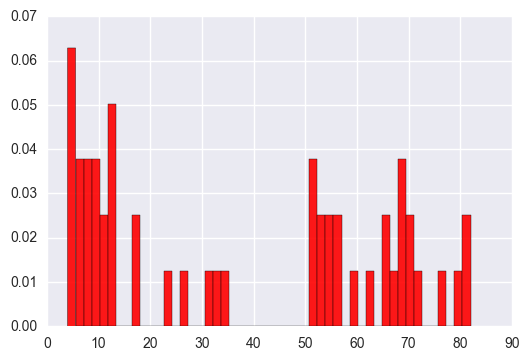

In [41]:
#14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

n, bins, patches = plt.hist(sat_dic['rate'], 50, normed=1, facecolor='red', alpha=0.90)

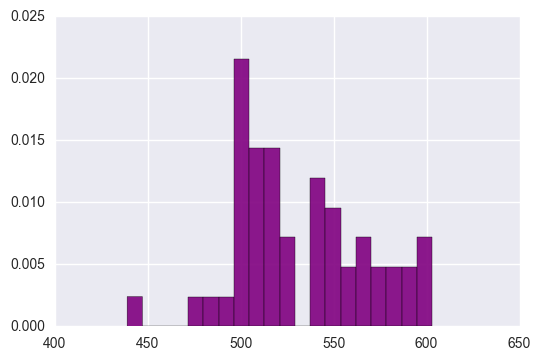

In [40]:
#15. Plot the Math distribution
n, bins, patches = plt.hist(sat_dic['math'], 20, normed=1, facecolor='purple', alpha=0.90)

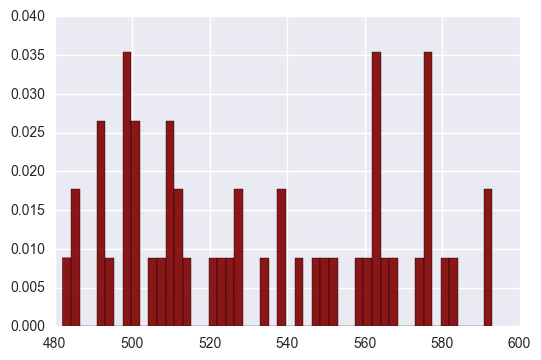

In [43]:
#16. Plot the Verbal distribution
n, bins, patches = plt.hist(sat_dic['verbal'], 50, normed=10, facecolor='maroon', alpha=0.90)

In [45]:
#17. What is the typical assumption for data distribution?
print "The distribution is normal"

The distribution is normal


In [51]:
#18. Does that distribution hold true for our data?
print 'No'

No


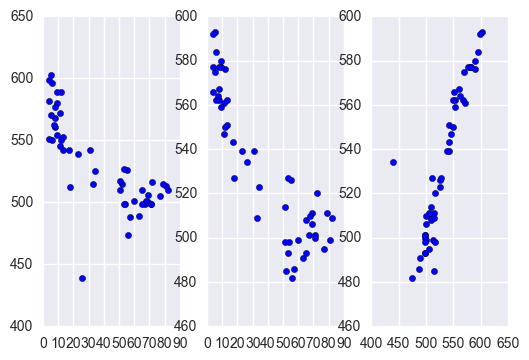

In [60]:
#19. Plot some scatterplots. BONUS: Use a PyPlot figure to present multiple plots at once.

fig = plt.figure()

ax1 = fig.add_subplot(131)
ax1.scatter(sat_dic['rate'], sat_dic['math'])

ax2 = fig.add_subplot(132)
ax2.scatter(sat_dic['rate'], sat_dic['verbal'])

ax3 = fig.add_subplot(133)
ax3.scatter(sat_dic['math'], sat_dic['verbal'])

In [63]:
#20. Are there any interesting relationships to note?
print 'Negative correlation between rate crossed with math, and rate cross with verbal.' 
print 'Positive correlation between math and verbal'

Negative correlation between rate crossed with math, and rate cross with verbal.
Positive correlation between math and verbal


{'boxes': [<matplotlib.lines.Line2D at 0x10fad7850>],
 'caps': [<matplotlib.lines.Line2D at 0x10faf6750>,
 'fliers': [<matplotlib.lines.Line2D at 0x10fac5a50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10fac5410>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10fad7a10>,
  <matplotlib.lines.Line2D at 0x10faf6110>]}

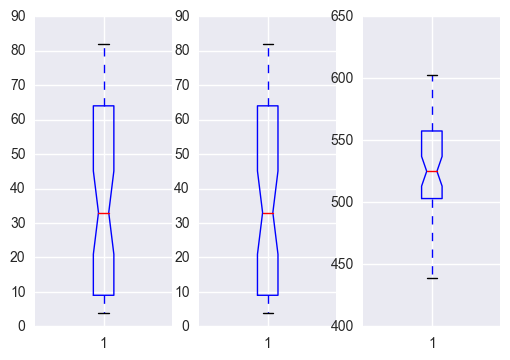

In [65]:
#21. Create box plots for each variable.
fig = plt.figure()

ax1 = fig.add_subplot(131)
ax1.boxplot(sat_dic['rate'], sat_dic['math'])

ax2 = fig.add_subplot(132)
ax2.boxplot(sat_dic['rate'], sat_dic['verbal'])

ax3 = fig.add_subplot(133)
ax3.boxplot(sat_dic['math'], sat_dic['verbal'])

In [ ]:
#BONUS: Using Tableau, create a heat map for each variable using a map of the US.